# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans ,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, adjusted_rand_score


## Load the Data

In [ ]:
df = pd.read_csv('/content/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [ ]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [ ]:
df.sample()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
3541,486470.0,234580.0,-0.741762,52.002892,43,3.0,2,1.0,14/12/2010,3,...,6,1030,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1.0,Yes,2010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [ ]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [ ]:
for col in df.columns:
  print(df[col].value_counts(),'\n')

Location_Easting_OSGR
531890.0    16
533650.0    15
531220.0    14
530980.0    13
533370.0    13
            ..
309450.0     1
575400.0     1
503208.0     1
457720.0     1
456682.0     1
Name: count, Length: 30693, dtype: int64 

Location_Northing_OSGR
181190.0    19
181310.0    17
180920.0    15
179690.0    15
181110.0    14
            ..
310945.0     1
489909.0     1
150650.0     1
809700.0     1
127058.0     1
Name: count, Length: 32580, dtype: int64 

Longitude
-0.100610    5
-0.096159    4
-0.570203    4
-2.948497    4
-0.044780    3
            ..
-5.307961    1
 0.036592    1
-1.505472    1
-1.612575    1
-1.212104    1
Name: count, Length: 50901, dtype: int64 

Latitude
51.515721    5
53.211710    4
53.404118    4
51.570594    4
51.371165    3
            ..
54.017044    1
50.123692    1
51.544534    1
55.009095    1
51.565050    1
Name: count, Length: 50701, dtype: int64 

Police_Force
1     7813
20    2047
6     2004
13    1925
43    1925
46    1644
44    1592
4     1557
50 

In [ ]:
df.duplicated().sum()

43

In [ ]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

Impute missing data

In [ ]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [ ]:
df['Accident_Severity'] = df['Accident_Severity'].fillna(df['Accident_Severity'].mode()[0])
df['Light_Conditions'] = df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0])
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])
df['Number_of_Casualties'] = df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean())

In [ ]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(51953, 26)

Remove the outliers

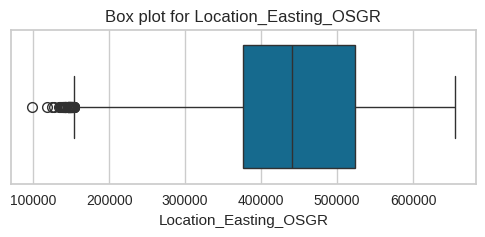

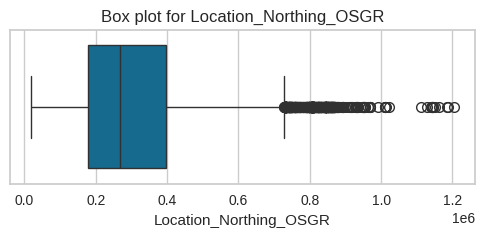

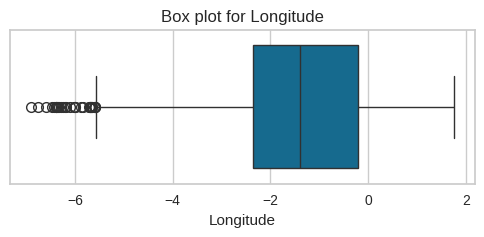

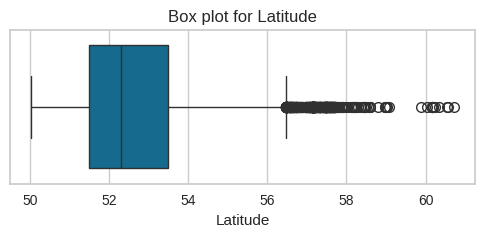

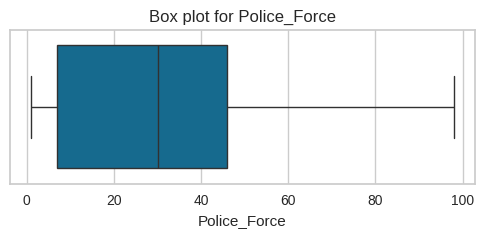

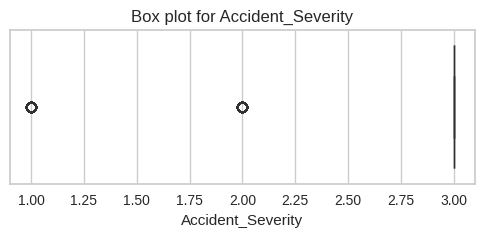

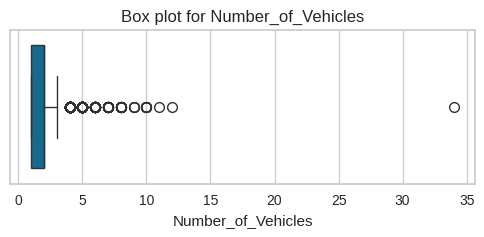

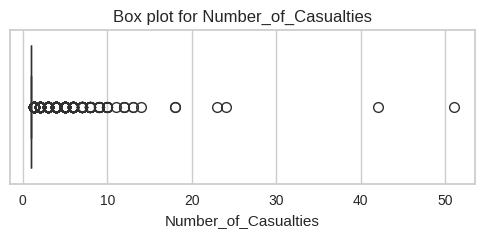

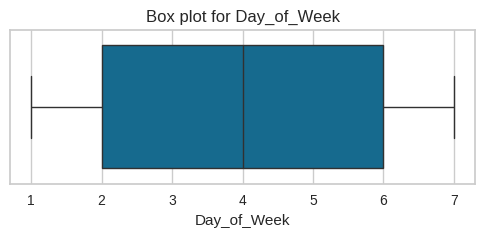

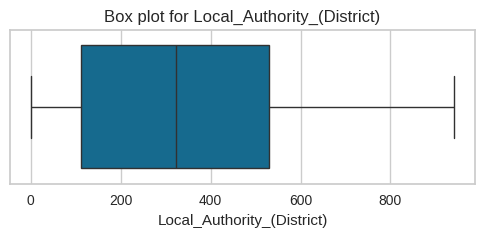

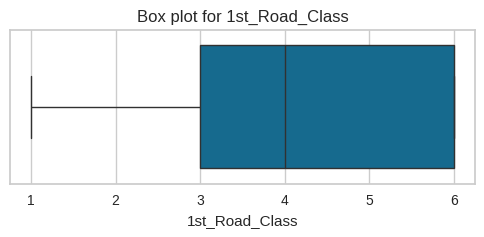

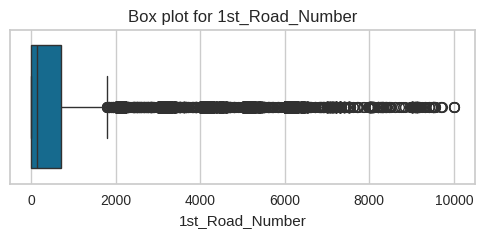

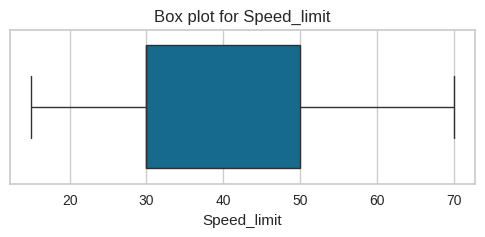

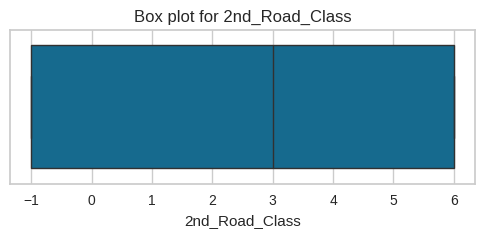

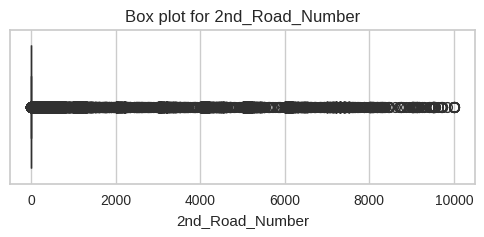

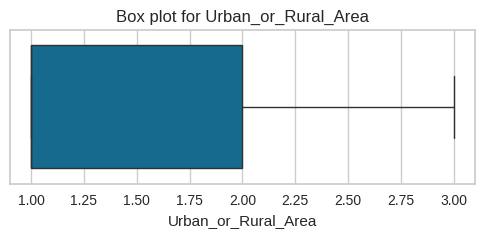

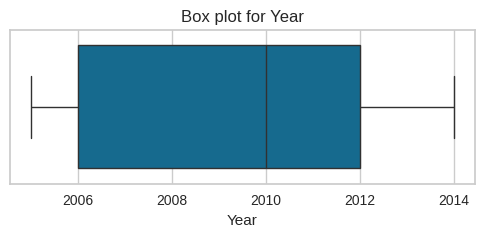

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
df = remove_outliers(df, ['Number_of_Casualties','Number_of_Vehicles','Accident_Severity'])


In [ ]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
6,418370.0,563150.0,-1.714623,54.962668,10,3.0,3,1.0,10/01/2007,4,...,6,416,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2007
7,424700.0,562370.0,-1.615830,54.955386,10,3.0,1,1.0,10/06/2006,7,...,6,326,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51990,445720.0,112570.0,-1.351076,50.910730,44,3.0,2,1.0,05/10/2007,6,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2007
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [ ]:
for column in df.columns:
    df[column] = df[column].replace(('Unknown','unknown','Other','other'), np.nan)
    df.dropna(subset=[column], inplace=True)

Scale the data

In [ ]:
df['Number_of_Casualties'] = df['Number_of_Casualties'].astype(int)

In [ ]:
scaler = MinMaxScaler()

for col in df.select_dtypes(include=['float64', 'int64']).columns:
  df.loc[:, col] = scaler.fit_transform(df[[col]])

Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
df = pd.get_dummies(df, columns = ['Did_Police_Officer_Attend_Scene_of_Accident'])

In [ ]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year,Did_Police_Officer_Attend_Scene_of_Accident_No,Did_Police_Officer_Attend_Scene_of_Accident_Yes
0,0.821849,0.071380,0.822939,0.073332,0.474227,0.0,0.0,0,27/11/2009,0.833333,...,0.0001,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),0.5,0.444444,False,True
1,0.724307,0.141638,0.738004,0.144461,0.000000,0.0,0.5,0,10/10/2010,0.000000,...,0.0001,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,0.0,0.555556,False,True
2,0.357321,0.126408,0.401939,0.129657,0.628866,0.0,0.5,0,14/09/2005,0.500000,...,0.4056,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,0.0,0.000000,False,True
6,0.553481,0.459054,0.583937,0.461694,0.092784,0.0,1.0,0,10/01/2007,0.500000,...,0.0417,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,0.0,0.222222,False,True
7,0.565431,0.458396,0.595791,0.461013,0.092784,0.0,0.0,0,10/06/2006,1.000000,...,0.0327,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,0.0,0.111111,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51990,0.605112,0.078658,0.627557,0.082497,0.443299,0.0,0.5,0,05/10/2007,0.833333,...,0.0001,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,0.0,0.222222,False,True
51995,0.660623,0.253255,0.683119,0.256194,0.329897,0.0,0.5,0,31/08/2012,0.833333,...,0.6486,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,0.0,0.777778,False,True
51996,0.625806,0.090889,0.646534,0.094598,0.443299,0.0,0.0,0,08/05/2013,0.500000,...,0.0001,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,0.5,0.888889,False,True
51997,0.784056,0.112157,0.791110,0.114440,0.453608,0.0,1.0,0,01/11/2011,0.333333,...,0.0001,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,0.0,0.666667,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31428 entries, 0 to 51999
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Location_Easting_OSGR                            31428 non-null  float64
 1   Location_Northing_OSGR                           31428 non-null  float64
 2   Longitude                                        31428 non-null  float64
 3   Latitude                                         31428 non-null  float64
 4   Police_Force                                     31428 non-null  float64
 5   Accident_Severity                                31428 non-null  float64
 6   Number_of_Vehicles                               31428 non-null  float64
 7   Number_of_Casualties                             31428 non-null  int64  
 8   Date                                             31428 non-null  object 
 9   Day_of_Week                      

In [ ]:
Order_categorical = ['Road_Surface_Conditions', 'Weather_Conditions','Light_Conditions',
                     'Pedestrian_Crossing-Physical_Facilities', 'Pedestrian_Crossing-Human_Control',
                     'Road_Type']

label_encoder = LabelEncoder()

for col in Order_categorical:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df = df.drop(['Local_Authority_(Highway)','Date'], axis=1)

In [ ]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year,Did_Police_Officer_Attend_Scene_of_Accident_No,Did_Police_Officer_Attend_Scene_of_Accident_Yes
0,0.821849,0.071380,0.822939,0.073332,0.474227,0.0,0.0,0,0.833333,0.590426,...,0.0001,2,2,0,3,1,0.5,0.444444,False,True
1,0.724307,0.141638,0.738004,0.144461,0.000000,0.0,0.5,0,0.000000,0.026596,...,0.0001,2,2,2,1,0,0.0,0.555556,False,True
2,0.357321,0.126408,0.401939,0.129657,0.628866,0.0,0.5,0,0.500000,0.792553,...,0.4056,2,2,4,1,0,0.0,0.000000,False,True
6,0.553481,0.459054,0.583937,0.461694,0.092784,0.0,1.0,0,0.500000,0.154255,...,0.0417,2,2,4,1,0,0.0,0.222222,False,True
7,0.565431,0.458396,0.595791,0.461013,0.092784,0.0,0.0,0,1.000000,0.154255,...,0.0327,2,2,4,1,0,0.0,0.111111,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51990,0.605112,0.078658,0.627557,0.082497,0.443299,0.0,0.5,0,0.833333,0.530851,...,0.0001,2,2,2,1,0,0.0,0.222222,False,True
51995,0.660623,0.253255,0.683119,0.256194,0.329897,0.0,0.5,0,0.833333,0.387234,...,0.6486,2,3,4,1,0,0.0,0.777778,False,True
51996,0.625806,0.090889,0.646534,0.094598,0.443299,0.0,0.0,0,0.500000,0.532979,...,0.0001,2,2,0,1,0,0.5,0.888889,False,True
51997,0.784056,0.112157,0.791110,0.114440,0.453608,0.0,1.0,0,0.333333,0.547872,...,0.0001,2,2,4,4,5,0.0,0.666667,False,True


In [ ]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year,Did_Police_Officer_Attend_Scene_of_Accident_No,Did_Police_Officer_Attend_Scene_of_Accident_Yes
0,0.821849,0.071380,0.822939,0.073332,0.474227,0.0,0.0,0,0.833333,0.590426,...,0.0001,2,2,0,3,1,0.5,0.444444,False,True
1,0.724307,0.141638,0.738004,0.144461,0.000000,0.0,0.5,0,0.000000,0.026596,...,0.0001,2,2,2,1,0,0.0,0.555556,False,True
2,0.357321,0.126408,0.401939,0.129657,0.628866,0.0,0.5,0,0.500000,0.792553,...,0.4056,2,2,4,1,0,0.0,0.000000,False,True
6,0.553481,0.459054,0.583937,0.461694,0.092784,0.0,1.0,0,0.500000,0.154255,...,0.0417,2,2,4,1,0,0.0,0.222222,False,True
7,0.565431,0.458396,0.595791,0.461013,0.092784,0.0,0.0,0,1.000000,0.154255,...,0.0327,2,2,4,1,0,0.0,0.111111,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51990,0.605112,0.078658,0.627557,0.082497,0.443299,0.0,0.5,0,0.833333,0.530851,...,0.0001,2,2,2,1,0,0.0,0.222222,False,True
51995,0.660623,0.253255,0.683119,0.256194,0.329897,0.0,0.5,0,0.833333,0.387234,...,0.6486,2,3,4,1,0,0.0,0.777778,False,True
51996,0.625806,0.090889,0.646534,0.094598,0.443299,0.0,0.0,0,0.500000,0.532979,...,0.0001,2,2,0,1,0,0.5,0.888889,False,True
51997,0.784056,0.112157,0.791110,0.114440,0.453608,0.0,1.0,0,0.333333,0.547872,...,0.0001,2,2,4,4,5,0.0,0.666667,False,True


Reduce dimentions using PCA and scaler


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

n_components = 3
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(df_scaled)
df_pca1 = pd.DataFrame(data_pca,columns=['PC{}'.format(i+1) for i in range(n_components)])
df_pca1

,PC1,PC2,PC3
0,0.027267,-4.580809,1.783157
1,-2.298680,-0.171409,-1.095844
2,1.269709,1.085759,-0.130499
3,0.292291,1.706167,-2.055242
4,0.441689,1.767111,-2.275045
...,...,...,...
31423,-0.693754,-0.285799,-0.178648
31424,-0.725635,0.748979,-1.232116
31425,0.406088,-2.888320,1.074718
31426,-0.957577,-0.886728,-0.514414


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
features = df[['Location_Easting_OSGR', 'Location_Northing_OSGR',
    'Longitude', 'Latitude','Local_Authority_(District)','1st_Road_Class',
    '1st_Road_Number','Road_Type','2nd_Road_Class',
    '2nd_Road_Number','Urban_or_Rural_Area']]

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

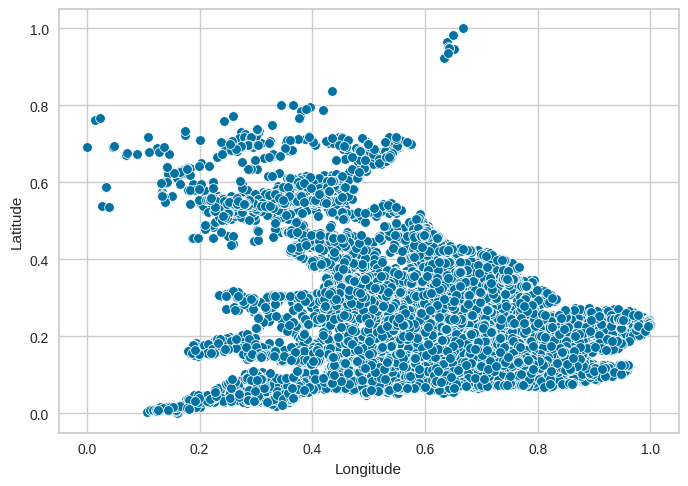

In [ ]:
sns.scatterplot(x='Longitude', y='Latitude', data=df)

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

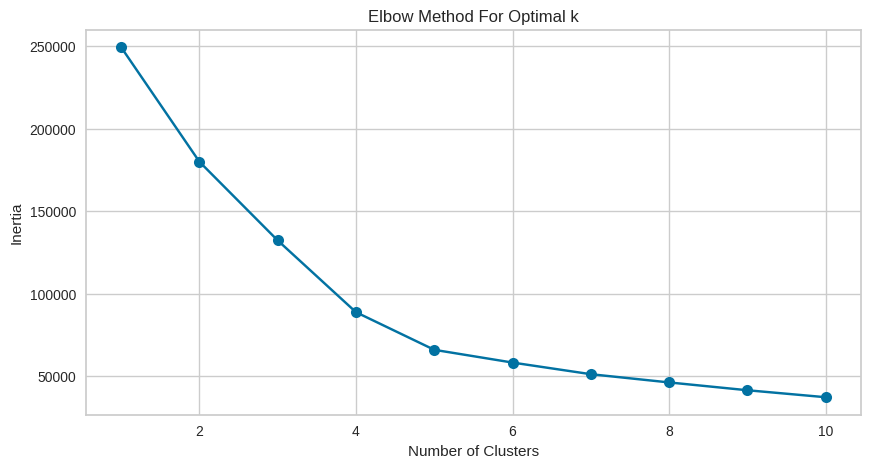

In [ ]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, inertias, 'bo-', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_pca)
y_kmeans = kmeans.predict(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year,Did_Police_Officer_Attend_Scene_of_Accident_No,Did_Police_Officer_Attend_Scene_of_Accident_Yes,Cluster
0,0.821849,0.071380,0.822939,0.073332,0.474227,0.0,0.0,0,0.833333,0.590426,...,2,2,0,3,1,0.5,0.444444,False,True,1
1,0.724307,0.141638,0.738004,0.144461,0.000000,0.0,0.5,0,0.000000,0.026596,...,2,2,2,1,0,0.0,0.555556,False,True,4
2,0.357321,0.126408,0.401939,0.129657,0.628866,0.0,0.5,0,0.500000,0.792553,...,2,2,4,1,0,0.0,0.000000,False,True,2
6,0.553481,0.459054,0.583937,0.461694,0.092784,0.0,1.0,0,0.500000,0.154255,...,2,2,4,1,0,0.0,0.222222,False,True,2
7,0.565431,0.458396,0.595791,0.461013,0.092784,0.0,0.0,0,1.000000,0.154255,...,2,2,4,1,0,0.0,0.111111,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51990,0.605112,0.078658,0.627557,0.082497,0.443299,0.0,0.5,0,0.833333,0.530851,...,2,2,2,1,0,0.0,0.222222,False,True,4
51995,0.660623,0.253255,0.683119,0.256194,0.329897,0.0,0.5,0,0.833333,0.387234,...,2,3,4,1,0,0.0,0.777778,False,True,2
51996,0.625806,0.090889,0.646534,0.094598,0.443299,0.0,0.0,0,0.500000,0.532979,...,2,2,0,1,0,0.5,0.888889,False,True,1
51997,0.784056,0.112157,0.791110,0.114440,0.453608,0.0,1.0,0,0.333333,0.547872,...,2,2,4,4,5,0.0,0.666667,False,True,4


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
silhouette_score = silhouette_score(data_pca, y_kmeans)
print(f'Silhouette Coefficient : %0.2f' %silhouette_score)

Silhouette Coefficient : 0.42


## Plot the data points with their predicted cluster center

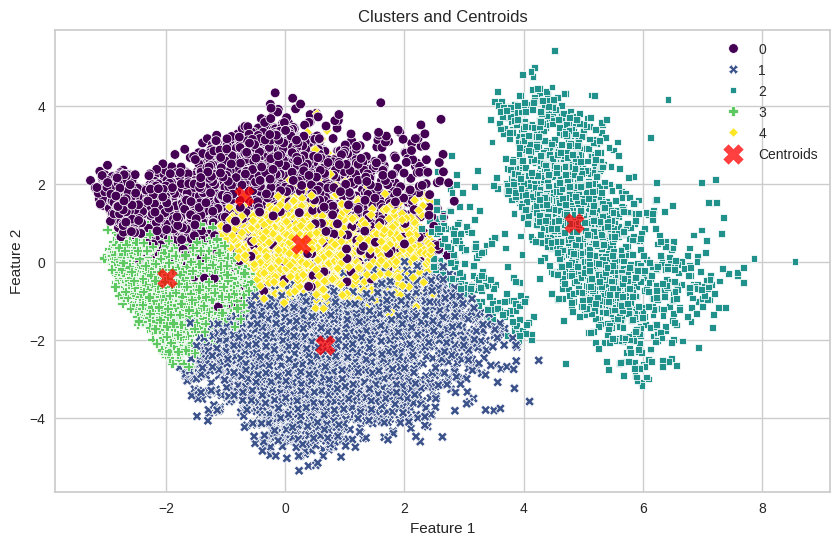

In [ ]:
df['Cluster'] = y_kmeans

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['Cluster'], palette='viridis', style=df['Cluster'], markers=True, legend='full')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title('Clusters and Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

Features Chosen for Clustering:I selected features related to accident locations, such as'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', ...                                                          These features provide critical insights into accident distribution and conditions that may influence accident frequency, helping to identify geographical patterns and similar clusters.                                                                     Enhance Feature Engineering: By adding new features or refining the representation of existing data.                                                                                                                                                  Number of Clusters Choices: 5
Determining the Optimal Number:Elbow Method